In [1]:
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [2]:
identity = pd.read_csv('data/train_identity.csv')
transaction = pd.read_csv('data/train_transaction.csv')

KeyboardInterrupt: 

In [ ]:
identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [8]:
for col in transaction.columns:
    if transaction[col].dtype == 'object':
        print(f"{col}: {transaction[col].nunique()} unique values")
    else:
        print(f"{col}: {transaction[col].nunique()} unique values")

TransactionID: 590540 unique values
isFraud: 2 unique values
TransactionDT: 573349 unique values
TransactionAmt: 20902 unique values
ProductCD: 5 unique values
card1: 13553 unique values
card2: 500 unique values
card3: 114 unique values
card4: 4 unique values
card5: 119 unique values
card6: 4 unique values
addr1: 332 unique values
addr2: 74 unique values
dist1: 2651 unique values
dist2: 1751 unique values
P_emaildomain: 59 unique values
R_emaildomain: 60 unique values
C1: 1657 unique values
C2: 1216 unique values
C3: 27 unique values
C4: 1260 unique values
C5: 319 unique values
C6: 1328 unique values
C7: 1103 unique values
C8: 1253 unique values
C9: 205 unique values
C10: 1231 unique values
C11: 1476 unique values
C12: 1199 unique values
C13: 1597 unique values
C14: 1108 unique values
D1: 641 unique values
D2: 641 unique values
D3: 649 unique values
D4: 808 unique values
D5: 688 unique values
D6: 829 unique values
D7: 597 unique values
D8: 12353 unique values
D9: 24 unique values
D10: 

# Merge train and test set

In [9]:
train = transaction.merge(identity, on="TransactionID", how="left")

# Save merged train
train.to_csv("data/train_merged.csv", index=False)

# Load and merge test
test_identity = pd.read_csv("data/test_identity.csv")
test_transaction = pd.read_csv("data/test_transaction.csv")
test = test_transaction.merge(test_identity, on="TransactionID", how="left")

# Save merged test
test.to_csv("data/test_merged.csv", index=False)

print("Train merged shape:", train.shape)
print("Test merged shape:", test.shape)
print("Files saved as data/train_merged.csv and data/test_merged.csv")

Train merged shape: (590540, 434)
Test merged shape: (506691, 433)
Files saved as data/train_merged.csv and data/test_merged.csv


# EDA 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("data/train_merged.csv") 

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


# Overview

In [4]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

In [5]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"#{col}: {df[col].nunique()} unique values")
        print(f'sample values: {df[col].dropna().unique()[:5]}')
    else:
        print(f"#{col}: {df[col].nunique()} unique values")
        print(f'sample values: {df[col].dropna().unique()[:5]}') 

#TransactionID: 590540 unique values
sample values: [2987000 2987001 2987002 2987003 2987004]
#isFraud: 2 unique values
sample values: [0 1]
#TransactionDT: 573349 unique values
sample values: [86400 86401 86469 86499 86506]
#TransactionAmt: 20902 unique values
sample values: [68.5 29.  59.  50.  49. ]
#ProductCD: 5 unique values
sample values: ['W' 'H' 'C' 'S' 'R']
#card1: 13553 unique values
sample values: [13926  2755  4663 18132  4497]
#card2: 500 unique values
sample values: [404. 490. 567. 514. 555.]
#card3: 114 unique values
sample values: [150. 117. 185. 143. 144.]
#card4: 4 unique values
sample values: ['discover' 'mastercard' 'visa' 'american express']
#card5: 119 unique values
sample values: [142. 102. 166. 117. 226.]
#card6: 4 unique values
sample values: ['credit' 'debit' 'debit or credit' 'charge card']
#addr1: 332 unique values
sample values: [315. 325. 330. 476. 420.]
#addr2: 74 unique values
sample values: [87. 96. 35. 60. 98.]
#dist1: 2651 unique values
sample values:

# 📊 Feature Explanation – IEEE-CIS Fraud Detection

## 1. Transaction Features
- **TransactionID**: Unique identifier for each transaction. Used to merge with the identity table, not directly useful for modeling.  
- **TransactionDT**: Time in seconds from a reference point (not a real timestamp).
- **TransactionAmt**: Transaction amount. Fraud often involves:  
  - Very small amounts (testing stolen cards).  
  - Very large amounts (cash-out quickly).  
- **ProductCD**: Product category (e.g., W, C, H, R, S).  

---

## 2. Card Features (card1–card6)
- **card1**: User/account identifier (anonymized).
- **card2**: Issuing bank (anonymized).  
- **card3**: Country of issuing bank.  
- **card4**: Card type (Visa, MasterCard, Amex, etc.).  
- **card5**: Card series number.  
- **card6**: Card category (credit/debit).    

---

## 3. Address Features
- **addr1**: Billing region.  
- **addr2**: Billing country.  

---

## 4. Email Features
- **P_emaildomain**: Purchaser’s email domain.  
- **R_emaildomain**: Recipient’s email domain.  

---

## 5. Counting Features (C1–C14)
- Pre-engineered **count statistics** (anonymized).  
- Example meaning: number of transactions linked to a card or user.  

---

## 6. Time Delta Features (D1–D15)
- Pre-engineered **time-related deltas**.  
- Examples:  
  - `D1` ≈ days since first transaction of user.  
  - `D10` ≈ days since last billing.  

---

## 7. Matching Features (M1–M9)
- Boolean flags (Yes/No/NaN).  
- Indicate whether information matches across sources (e.g., billing vs. shipping address, email vs. card info).  

---

## 8. Engineered Features (V1–V339)
- Large set of anonymized engineered features.  
- Likely derived from C/D/M variables via normalization, statistical transformations, or PCA.  


---

## 9. Identity Features
- **DeviceType**: Desktop or mobile.  
- **DeviceInfo**: OS/browser/device information.  
- **id_01–id_38**: Digital identity flags (proxy usage, cookies, authentication methods, risk scores).  

---

## ✅ Summary
- **Transaction-related features**: core info (time, amount, product).  
- **Card/Address/Email**: user identifiers, useful for grouping & mismatch detection.  
- **C, D, M features**: pre-computed stats on frequency, time deltas, matches.  
- **V features**: anonymized engineered variables.  
- **Identity features**: digital fingerprint of users.  

Together, these 400+ features provide rich signals for modeling fraud detection.

# Data quality check 

# EDA on each group feature

## Transaction Features 

### TransactionDT 

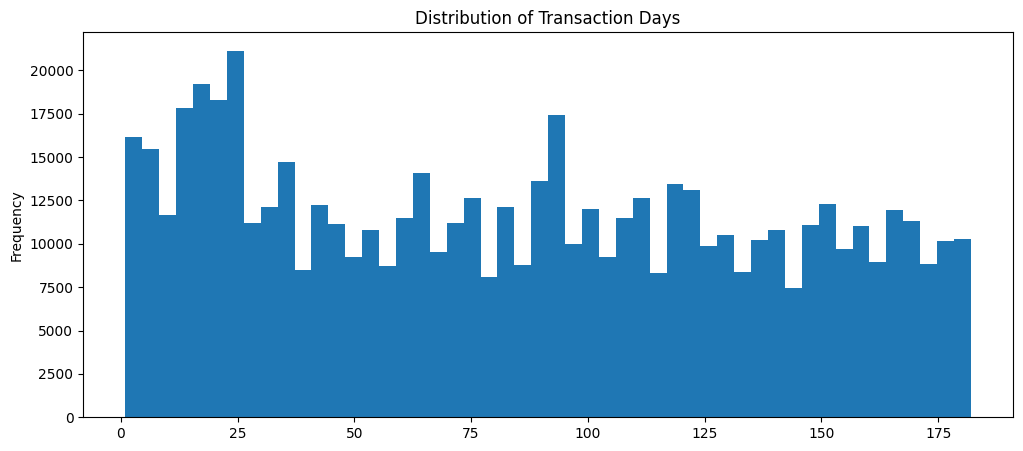

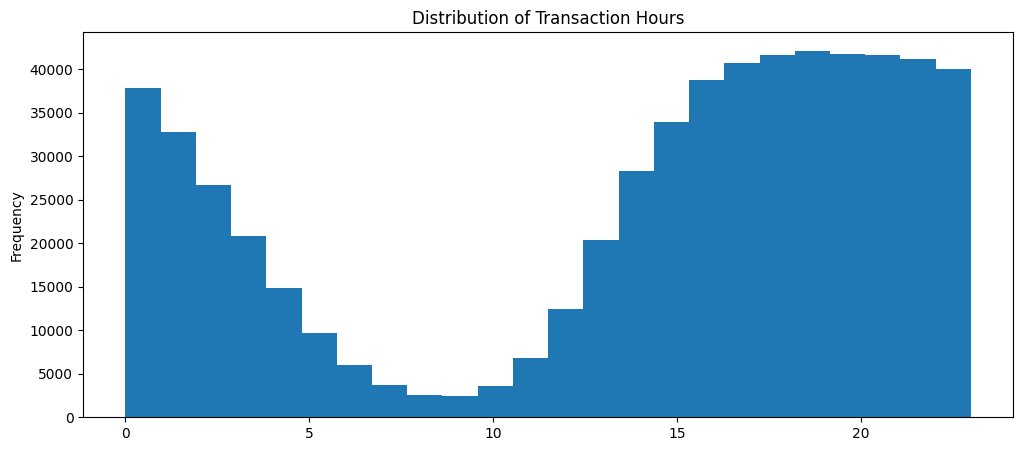

In [6]:


# Convert TransactionDT into days (approximate)
df["TransactionDay"] = df["TransactionDT"] // (24*60*60)
df["TransactionHour"] = (df["TransactionDT"] // 3600) % 24

# Plot transactions over time
plt.figure(figsize=(12,5))
df["TransactionDay"].plot(kind="hist", bins=50, title="Distribution of Transaction Days")
plt.show()

plt.figure(figsize=(12,5))
df["TransactionHour"].plot(kind="hist", bins=24, title="Distribution of Transaction Hours")
plt.show()


The histogram shows a clear cyclical pattern in transaction time. Instead of being uniformly distributed, transactions are concentrated in specific time ranges, creating two main peaks. This indicates that transactions tend to occur more frequently during certain periods, possibly reflecting daily user behavior (example: daytime vs nighttime activity). Such patterns could be relevant in detecting anomalies, since fraudulent transactions may not follow the same temporal distribution as legitimate ones.

### Amount

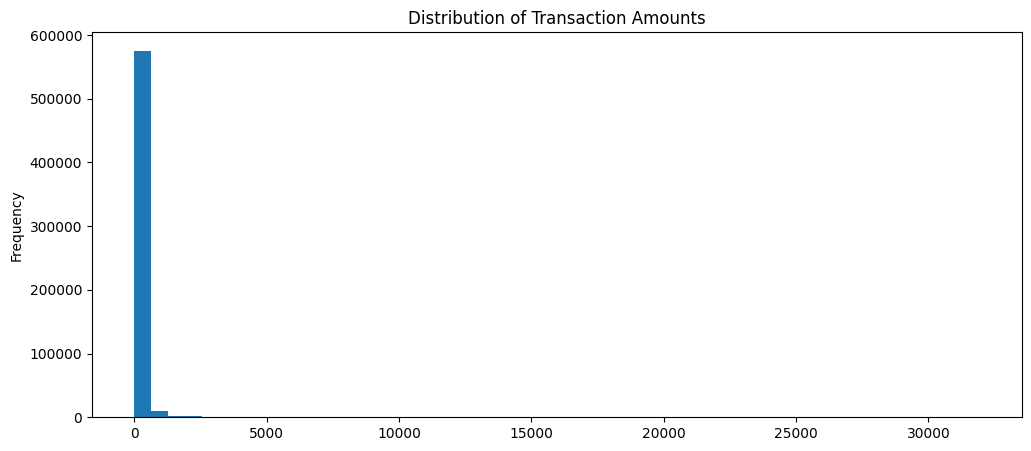

In [7]:
# plot amount distribution
plt.figure(figsize=(12,5))
df["TransactionAmt"].plot(kind="hist", bins=50, title="Distribution of Transaction Amounts")
plt.show()


The histogram shows that most transactions involve very small amounts, with the frequency rapidly decreasing as the transaction amount increases. This results in a highly skewed distribution with a long tail to the right. Only a small fraction of transactions involve large amounts, but these extreme values could be important when analyzing fraud, since abnormal or unusually high amounts might be associated with fraudulent behavior.

### Amount vs isFraud

Target Variable Distribution:
isFraud
0    569877
1     20663
Name: count, dtype: int64
Fraud Rate: 0.0350


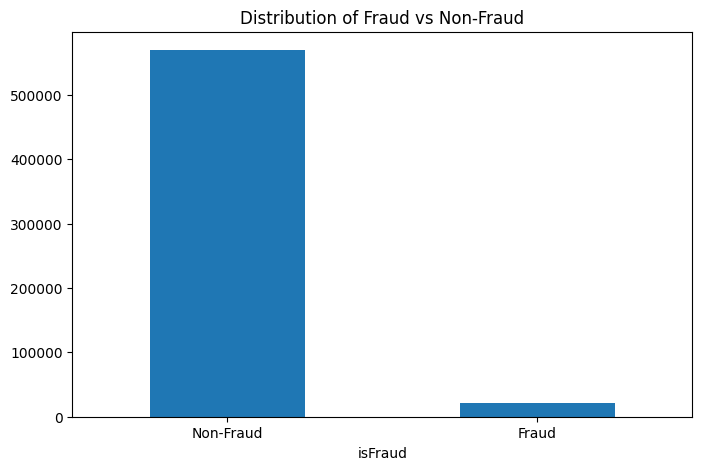

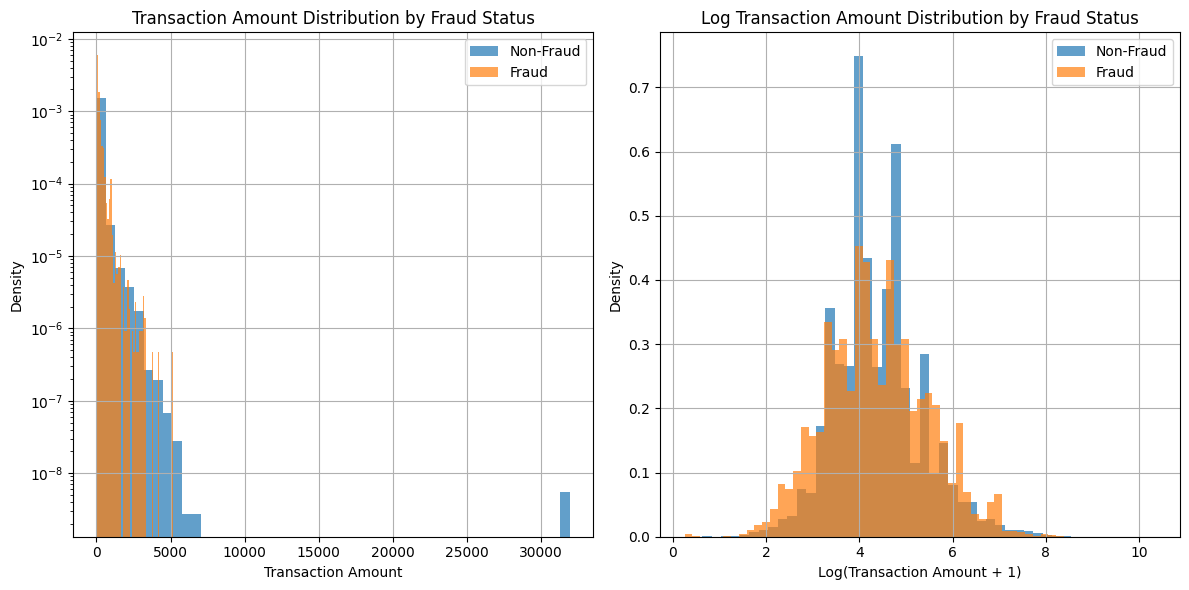


Transaction Amount Statistics by Fraud Status:
            count        mean         std    min     25%   50%    75%  \
isFraud                                                                 
0        569877.0  134.511665  239.395078  0.251  43.970  68.5  120.0   
1         20663.0  149.244779  232.212163  0.292  35.044  75.0  161.0   

               max  
isFraud             
0        31937.391  
1         5191.000  


In [8]:
# Transaction Features Analysis

# First, let's check the target variable distribution
print("Target Variable Distribution:")
print(df['isFraud'].value_counts())
print(f"Fraud Rate: {df['isFraud'].mean():.4f}")

plt.figure(figsize=(8,5))
df['isFraud'].value_counts().plot(kind='bar', title='Distribution of Fraud vs Non-Fraud')
plt.xticks([0,1], ['Non-Fraud', 'Fraud'], rotation=0)
plt.show()

# Transaction Amount vs Fraud
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
df[df['isFraud']==0]['TransactionAmt'].hist(bins=50, alpha=0.7, label='Non-Fraud', density=True)
df[df['isFraud']==1]['TransactionAmt'].hist(bins=50, alpha=0.7, label='Fraud', density=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.title('Transaction Amount Distribution by Fraud Status')
plt.yscale('log')

plt.subplot(1,2,2)
# Log transform for better visualization
df['TransactionAmt_log'] = np.log1p(df['TransactionAmt'])
df[df['isFraud']==0]['TransactionAmt_log'].hist(bins=50, alpha=0.7, label='Non-Fraud', density=True)
df[df['isFraud']==1]['TransactionAmt_log'].hist(bins=50, alpha=0.7, label='Fraud', density=True)
plt.xlabel('Log(Transaction Amount + 1)')
plt.ylabel('Density')
plt.legend()
plt.title('Log Transaction Amount Distribution by Fraud Status')

plt.tight_layout()
plt.show()

# Statistical summary by fraud status
print("\nTransaction Amount Statistics by Fraud Status:")
print(df.groupby('isFraud')['TransactionAmt'].describe())

<Axes: xlabel='TransactionAmt_log', ylabel='Count'>

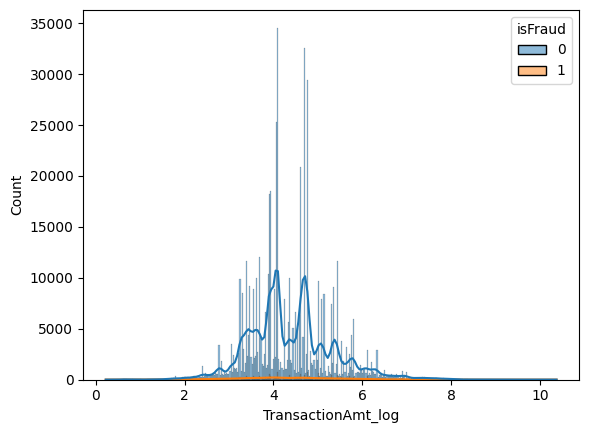

In [9]:
import seaborn as sns
sns.histplot(data=df, x="TransactionAmt_log", hue="isFraud", log_scale=False, kde=True)


- Log transformation is effective for reducing skewness and making the data more suitable for modeling.

- Transaction amount alone is not a strong discriminator between Fraud and Non-Fraud, since their distributions are quite similar after transformation.

- Very high-value transactions are mostly Non-Fraud, which could serve as a minor signal.

- To detect fraud effectively, this feature should be combined with other behavioral or contextual features (time, frequency, location, sender/receiver, etc.).

### ProductCD

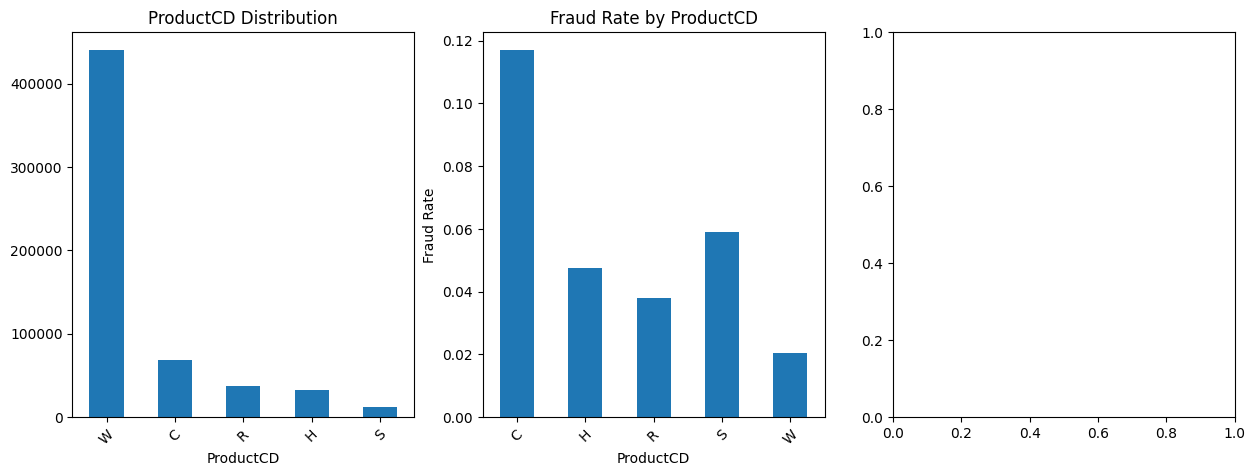

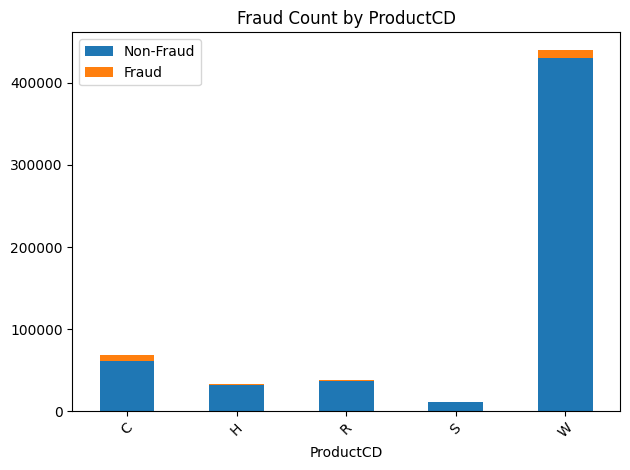


Fraud Rate by ProductCD:
ProductCD
C    0.116873
S    0.058996
H    0.047662
R    0.037826
W    0.020399
Name: isFraud, dtype: float64


In [10]:
# ProductCD Analysis
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df['ProductCD'].value_counts().plot(kind='bar', title='ProductCD Distribution')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
fraud_by_product = df.groupby('ProductCD')['isFraud'].mean()
fraud_by_product.plot(kind='bar', title='Fraud Rate by ProductCD')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
product_fraud_counts = df.groupby(['ProductCD', 'isFraud']).size().unstack(fill_value=0)
product_fraud_counts.plot(kind='bar', stacked=True, title='Fraud Count by ProductCD')
plt.legend(['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("\nFraud Rate by ProductCD:")
print(fraud_by_product.sort_values(ascending=False))

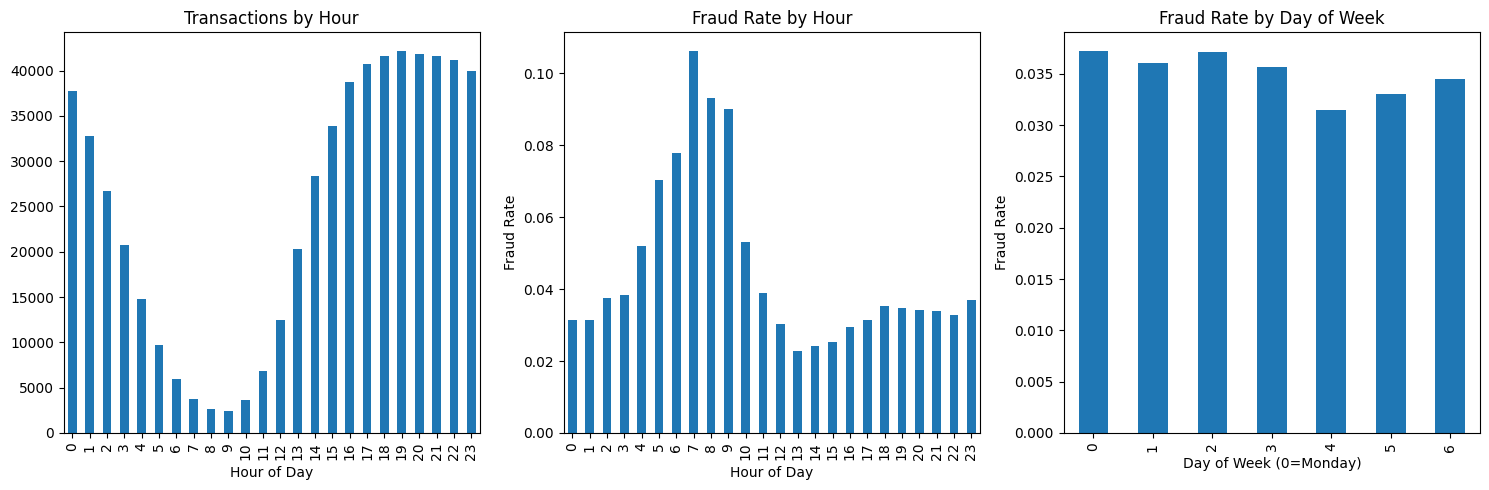


Fraud Rate by Hour:
TransactionHour
7     0.106102
8     0.093014
9     0.089956
6     0.077743
5     0.070302
10    0.053212
4     0.051890
11    0.038816
3     0.038314
2     0.037483
23    0.036997
18    0.035231
19    0.034738
20    0.034273
21    0.034005
22    0.032694
17    0.031530
0     0.031380
1     0.031314
12    0.030439
16    0.029511
15    0.025399
14    0.024216
13    0.022889
Name: isFraud, dtype: float64


In [11]:
# Time-based Analysis
# Transaction patterns by hour
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
df['TransactionHour'].value_counts().sort_index().plot(kind='bar', title='Transactions by Hour')
plt.xlabel('Hour of Day')

plt.subplot(1,3,2)
hourly_fraud_rate = df.groupby('TransactionHour')['isFraud'].mean()
hourly_fraud_rate.plot(kind='bar', title='Fraud Rate by Hour')
plt.ylabel('Fraud Rate')
plt.xlabel('Hour of Day')

plt.subplot(1,3,3)
# Day of week analysis (approximate)
df['DayOfWeek'] = df['TransactionDay'] % 7
daily_fraud_rate = df.groupby('DayOfWeek')['isFraud'].mean()
daily_fraud_rate.plot(kind='bar', title='Fraud Rate by Day of Week')
plt.ylabel('Fraud Rate')
plt.xlabel('Day of Week (0=Monday)')

plt.tight_layout()
plt.show()

print("\nFraud Rate by Hour:")
print(hourly_fraud_rate.sort_values(ascending=False))

`1. Transactions by Hour (left)`

Transaction volume is lowest during the early morning (3 AM – 6 AM) and gradually increases during the day.

There is a peak in the evening (around 6 PM – 9 PM), when the number of transactions is the highest.

This pattern likely reflects typical human activity: fewer transactions overnight and more during active business and leisure hours.

`2. Fraud Rate by Hour (middle)`

The fraud rate is highest in the early morning (around 6–9 AM), peaking sharply around 7 AM at more than 10%.

After 10 AM, the fraud rate drops significantly and remains relatively stable throughout the day.

Interestingly, fraud tends to occur disproportionately when transaction volume is low, which may indicate fraudsters exploit periods of lower monitoring or lower user activity.

`3. Fraud Rate by Day of Week (right)`

Fraud rates are relatively consistent across the week, but:

Monday (0) and Wednesday (2) show the highest fraud rates (~3.7%).

Friday (4) shows the lowest fraud rate (~3.1%).

This suggests some weekly behavioral patterns, but the variation is not as strong as the hourly effect.

`4. Key Takeaways`

Fraudulent activity is time-sensitive: fraud risk is elevated during early-morning hours, despite fewer transactions overall.

Monitoring systems may need extra vigilance in off-peak hours, when fraudsters seem more active.

Fraud risk is slightly higher at the start and middle of the week, though differences across days are moderate.

Combining transaction timing (hour, day) with other features could improve fraud detection models.

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16732\564219733.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = product_data.groupby(amount_bins)['isFraud'].mean()


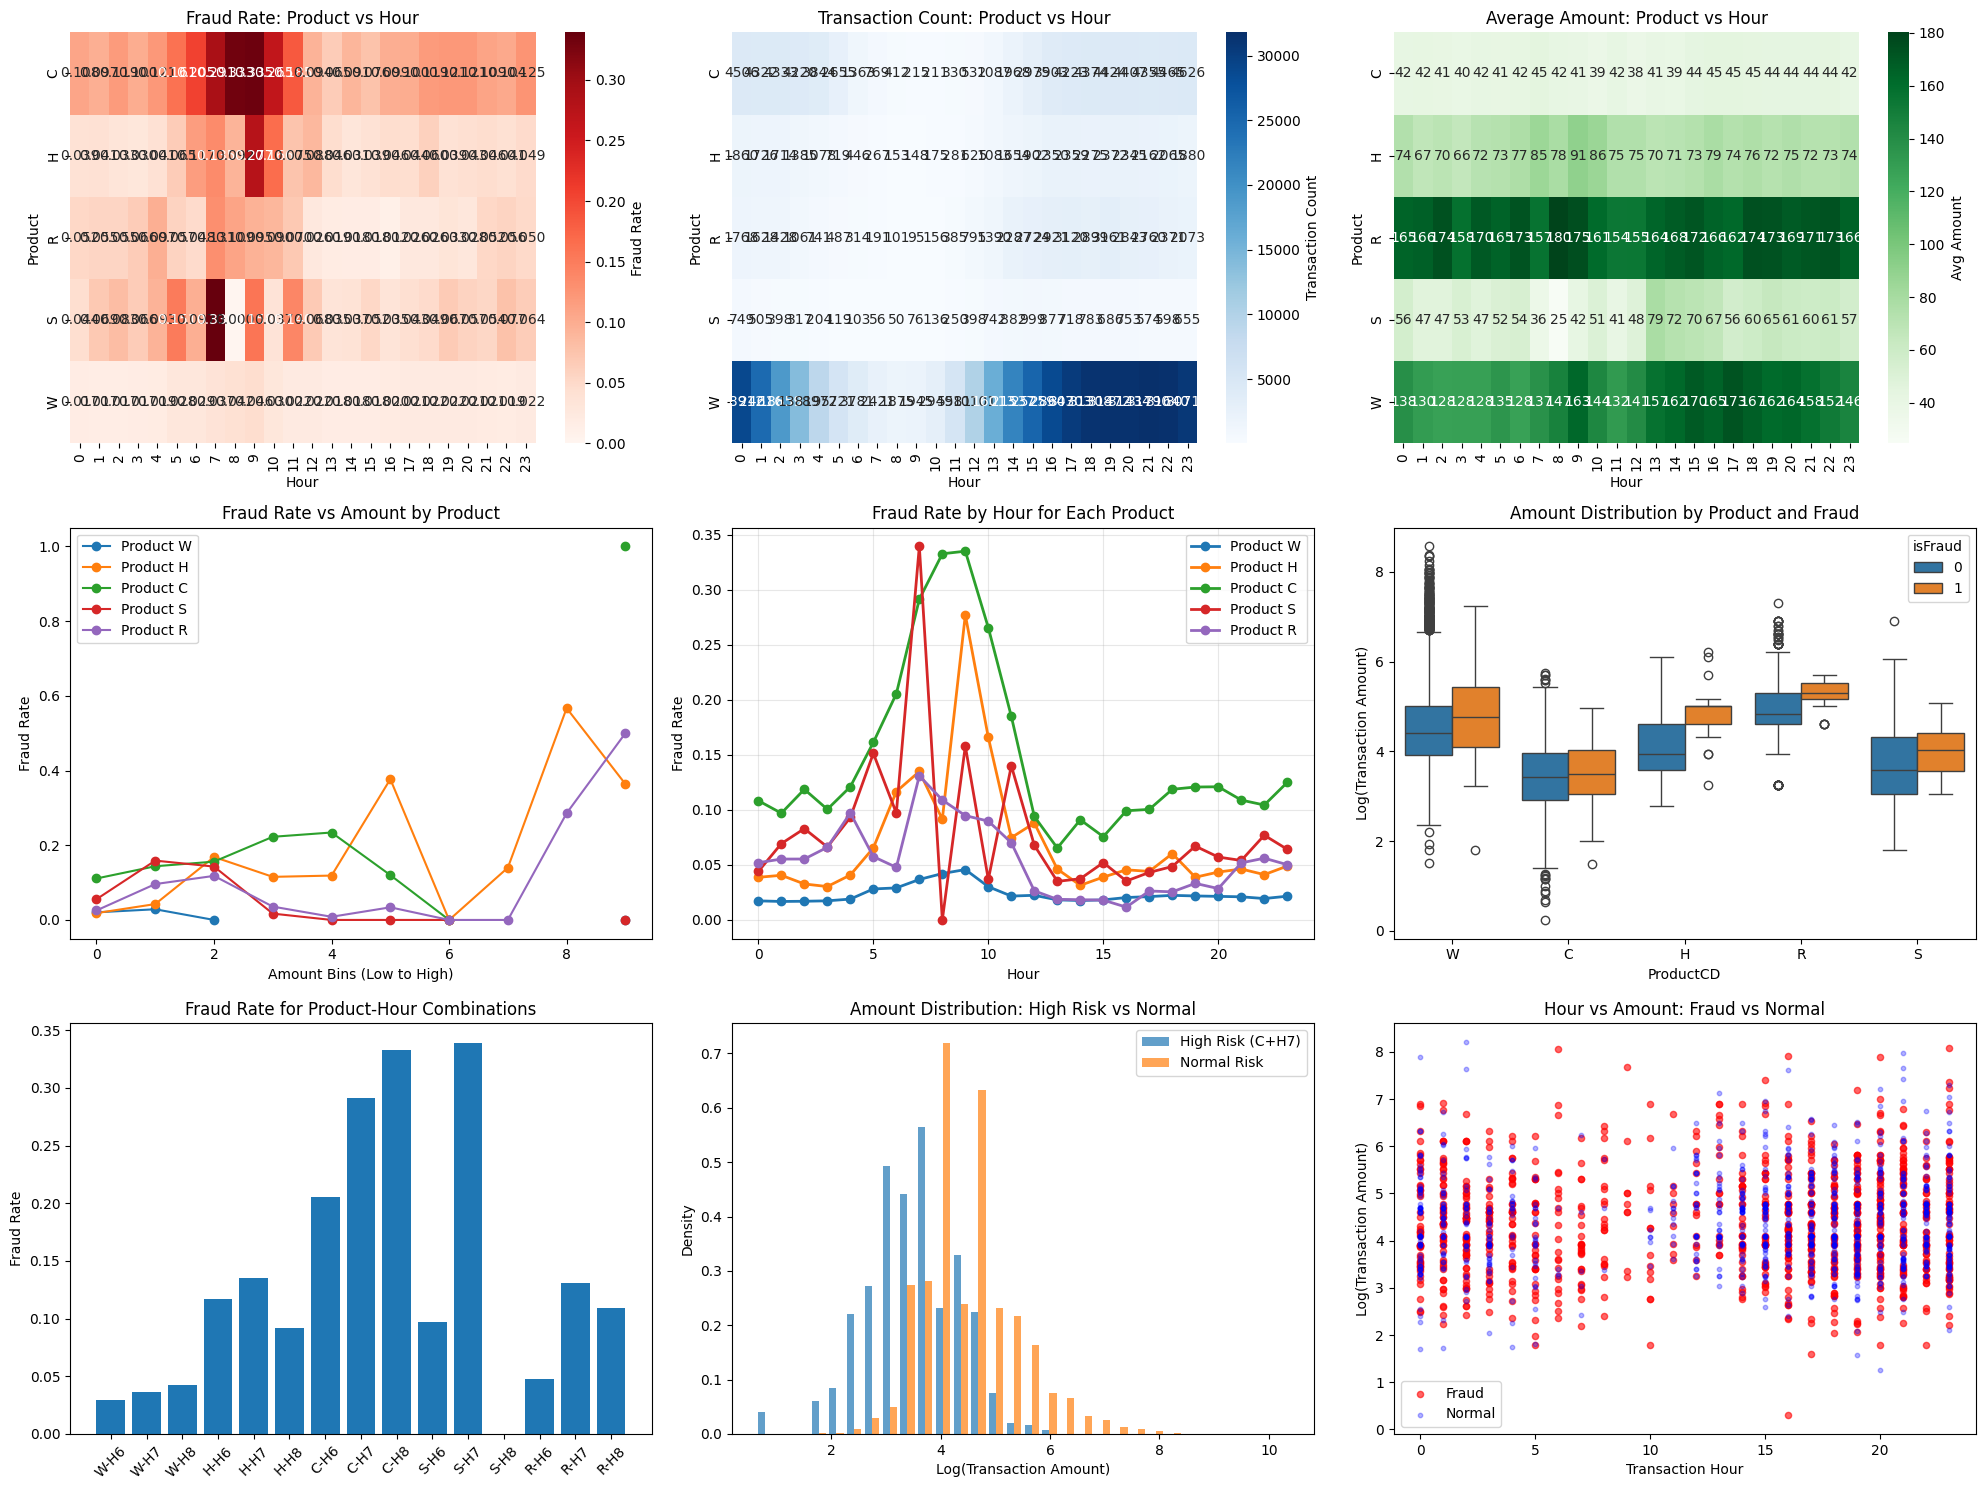

In [12]:
# Deep analysis of Product, Hours, Amount vs Fraud
import seaborn as sns

plt.figure(figsize=(20, 15))

# 1. Fraud Rate by Product and Hour (Heatmap)
plt.subplot(3, 3, 1)
fraud_heatmap = df.groupby(['ProductCD', 'TransactionHour'])['isFraud'].mean().unstack(fill_value=0)
sns.heatmap(fraud_heatmap, annot=True, fmt='.3f', cmap='Reds', 
            cbar_kws={'label': 'Fraud Rate'})
plt.title('Fraud Rate: Product vs Hour')
plt.ylabel('Product')
plt.xlabel('Hour')

# 2. Transaction Count by Product and Hour
plt.subplot(3, 3, 2)
count_heatmap = df.groupby(['ProductCD', 'TransactionHour']).size().unstack(fill_value=0)
sns.heatmap(count_heatmap, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Transaction Count'})
plt.title('Transaction Count: Product vs Hour')
plt.ylabel('Product')
plt.xlabel('Hour')

# 3. Average Amount by Product and Hour
plt.subplot(3, 3, 3)
amount_heatmap = df.groupby(['ProductCD', 'TransactionHour'])['TransactionAmt'].mean().unstack(fill_value=0)
sns.heatmap(amount_heatmap, annot=True, fmt='.0f', cmap='Greens',
            cbar_kws={'label': 'Avg Amount'})
plt.title('Average Amount: Product vs Hour')
plt.ylabel('Product')
plt.xlabel('Hour')

# 4. Fraud Rate vs Transaction Amount by Product
plt.subplot(3, 3, 4)
for product in df['ProductCD'].unique():
    if pd.notna(product):
        product_data = df[df['ProductCD'] == product]
        amount_bins = pd.cut(product_data['TransactionAmt'], bins=10)
        fraud_by_amount = product_data.groupby(amount_bins)['isFraud'].mean()
        plt.plot(range(len(fraud_by_amount)), fraud_by_amount.values, 
                marker='o', label=f'Product {product}')
plt.title('Fraud Rate vs Amount by Product')
plt.xlabel('Amount Bins (Low to High)')
plt.ylabel('Fraud Rate')
plt.legend()

# 5. Fraud Rate vs Hour by Product
plt.subplot(3, 3, 5)
for product in df['ProductCD'].unique():
    if pd.notna(product):
        product_data = df[df['ProductCD'] == product]
        hourly_fraud = product_data.groupby('TransactionHour')['isFraud'].mean()
        plt.plot(hourly_fraud.index, hourly_fraud.values, 
                marker='o', label=f'Product {product}', linewidth=2)
plt.title('Fraud Rate by Hour for Each Product')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Box plot: Amount distribution by Product and Fraud
plt.subplot(3, 3, 6)
df_sample = df.sample(10000)  # Sample for better visualization
sns.boxplot(data=df_sample, x='ProductCD', y='TransactionAmt_log', hue='isFraud')
plt.title('Amount Distribution by Product and Fraud')
plt.ylabel('Log(Transaction Amount)')
plt.yscale('linear')

# 7. High-risk combinations (Product C + Hour 7)
plt.subplot(3, 3, 7)
risk_combinations = []
fraud_rates = []
labels = []

for product in df['ProductCD'].unique():
    if pd.notna(product):
        for hour in [6, 7, 8]:  # Focus on high-risk hours
            subset = df[(df['ProductCD'] == product) & (df['TransactionHour'] == hour)]
            if len(subset) > 10:  # Only if enough samples
                fraud_rate = subset['isFraud'].mean()
                risk_combinations.append(f'{product}-H{hour}')
                fraud_rates.append(fraud_rate)
                labels.append(f'Product {product}, Hour {hour}')

plt.bar(range(len(fraud_rates)), fraud_rates)
plt.xticks(range(len(fraud_rates)), risk_combinations, rotation=45)
plt.title('Fraud Rate for Product-Hour Combinations')
plt.ylabel('Fraud Rate')

# 8. Amount patterns for high-risk scenarios
plt.subplot(3, 3, 8)
high_risk = df[(df['ProductCD'] == 'C') & (df['TransactionHour'] == 7)]
normal_risk = df[(df['ProductCD'] != 'C') & (df['TransactionHour'] != 7)]

plt.hist([high_risk['TransactionAmt_log'], normal_risk['TransactionAmt_log']], 
         bins=30, alpha=0.7, density=True,
         label=['High Risk (C+H7)', 'Normal Risk'])
plt.title('Amount Distribution: High Risk vs Normal')
plt.xlabel('Log(Transaction Amount)')
plt.ylabel('Density')
plt.legend()

# 9. 3D visualization concept (simplified as scatter)
plt.subplot(3, 3, 9)
fraud_data = df[df['isFraud'] == 1].sample(min(1000, len(df[df['isFraud'] == 1])))
normal_data = df[df['isFraud'] == 0].sample(min(1000, len(df[df['isFraud'] == 0])))

plt.scatter(fraud_data['TransactionHour'], fraud_data['TransactionAmt_log'], 
           c='red', alpha=0.6, s=20, label='Fraud')
plt.scatter(normal_data['TransactionHour'], normal_data['TransactionAmt_log'], 
           c='blue', alpha=0.3, s=10, label='Normal')
plt.title('Hour vs Amount: Fraud vs Normal')
plt.xlabel('Transaction Hour')
plt.ylabel('Log(Transaction Amount)')
plt.legend()

plt.tight_layout()
plt.show()

## Card feature 

In [17]:
cols = [f'card{i}' for i in range(1, 7)]

for col in cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
        print(f'sample values: {df[col].dropna().unique()[:5]}')
    else:
        print(f"{col} not in dataframe") 

card1: 13553 unique values
sample values: [13926  2755  4663 18132  4497]
card2: 500 unique values
sample values: [404. 490. 567. 514. 555.]
card3: 114 unique values
sample values: [150. 117. 185. 143. 144.]
card4: 4 unique values
sample values: ['discover' 'mastercard' 'visa' 'american express']
card5: 119 unique values
sample values: [142. 102. 166. 117. 226.]
card6: 4 unique values
sample values: ['credit' 'debit' 'debit or credit' 'charge card']


### card1

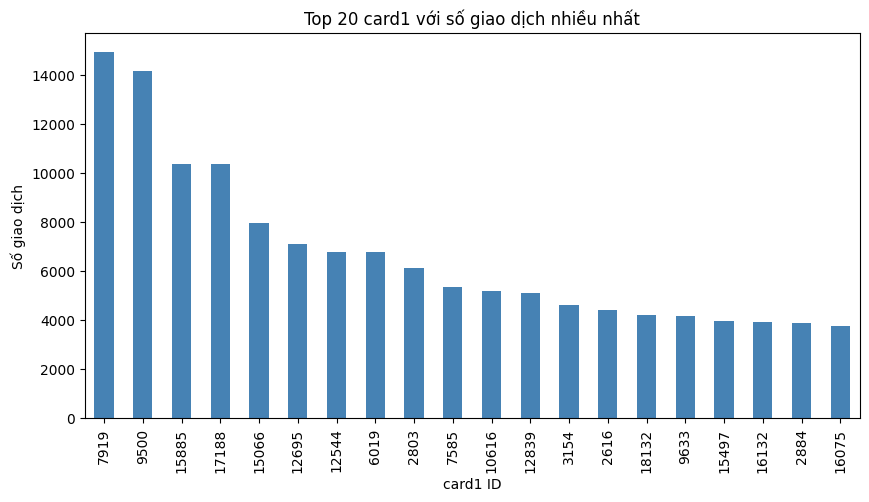

In [ ]:
card1_counts = df['card1'].value_counts()

plt.figure(figsize=(10,5))
card1_counts[:20].plot(kind='bar', color='steelblue')
plt.title("Top 20 card1 with Most Transactions")
plt.xlabel("card1 ID")
plt.ylabel("Number of Transactions")
plt.show()

After the top 2, the counts drop noticeably, showing a long-tail effect where most card IDs have far fewer transactions. 

7919 and 9500 stand out as extreme outliers with unusually high transaction activity. 

! These IDs could represent high-frequency users, automated transactions, or even anomalies worth deeper investigation (e.g., link to fraud ratio).
 
`Such concentration can bias models: if fraud is concentrated in these high-activity IDs, they will disproportionately influence training.`

`Important next step: check the fraud rate per card1, especially for IDs with extreme transaction volumes.`

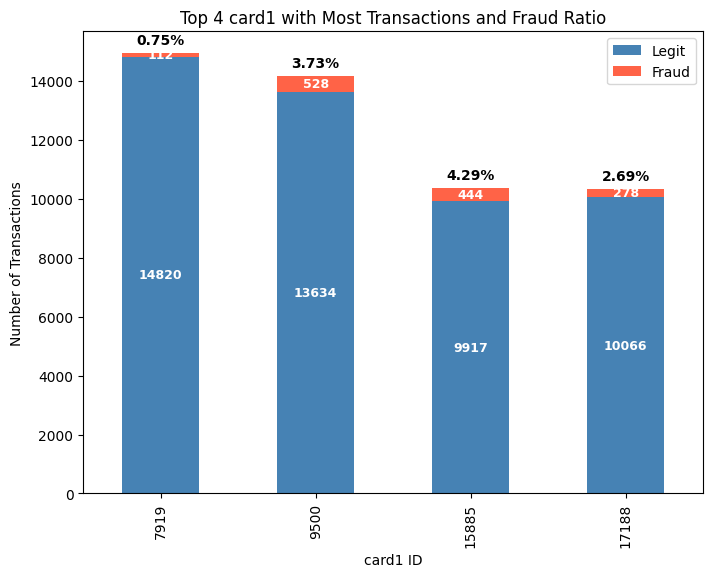

In [ ]:
import numpy as np


top4_data = df.groupby(['card1', 'isFraud']).size().unstack(fill_value=0).loc[card1_counts.index[:4]]

fraud_ratio = (top4_data[1] / (top4_data[0] + top4_data[1]) * 100).round(2)

ax = top4_data.plot(kind='bar', stacked=True, figsize=(8,6), color=['steelblue','tomato'])

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=9, color='white', fontweight='bold')

for idx, val in enumerate(fraud_ratio):
    total = top4_data.sum(axis=1).iloc[idx]
    ax.text(idx, total + 200, f"{val}%", ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

plt.title("Top 4 card1 with Most Transactions")
plt.xlabel("card1 ID")
plt.ylabel("Number of Transactions")
plt.legend(['Legit', 'Fraud'])
plt.show()


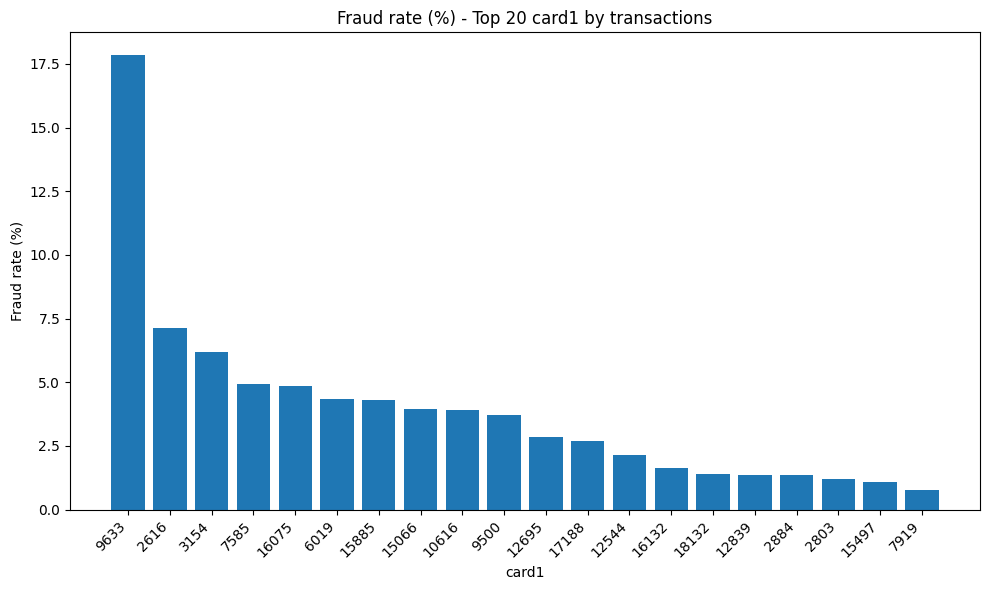

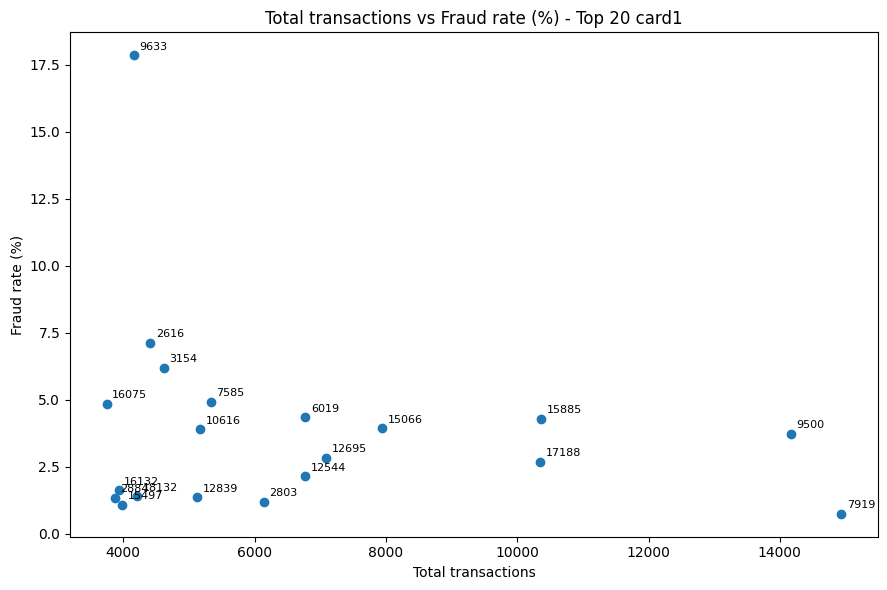

In [28]:
K = 20
topk_ids = df['card1'].value_counts().head(K).index

g = (df[df['card1'].isin(topk_ids)]
     .groupby('card1')['isFraud']
     .agg(total='size', fraud='sum'))
g['fraud_rate'] = g['fraud'] / g['total']

g_bar = g.sort_values('fraud_rate', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(g_bar.index.astype(str), (g_bar['fraud_rate']*100).values)
plt.title(f"Fraud rate (%) - Top {K} card1 by transactions")
plt.xlabel("card1")
plt.ylabel("Fraud rate (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,6))
plt.scatter(g['total'], g['fraud_rate']*100)
plt.title(f"Total transactions vs Fraud rate (%) - Top {K} card1")
plt.xlabel("Total transactions")
plt.ylabel("Fraud rate (%)")

for rid, row in g.iterrows():
    plt.annotate(str(rid), (row['total'], row['fraud_rate']*100),
                 textcoords="offset points", xytext=(4,4), fontsize=8)
plt.tight_layout()
plt.show()

- user 9633 has the highest fraud transaction 

### card2

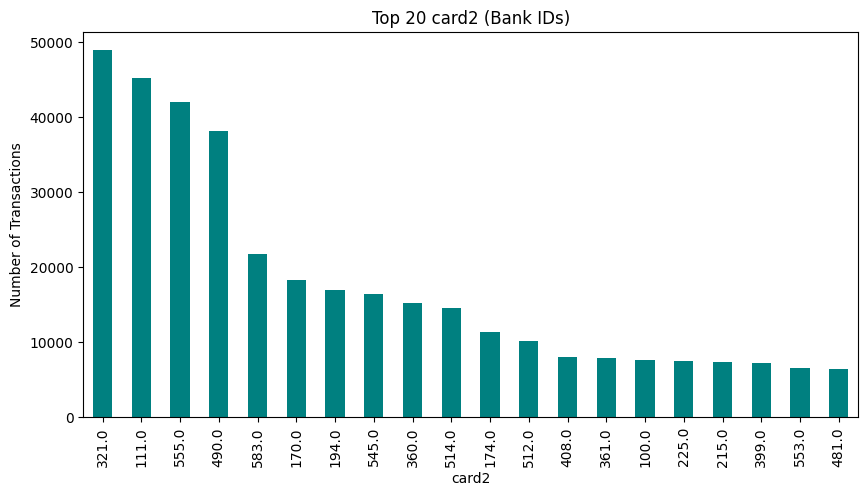

In [29]:
card2_counts = df['card2'].value_counts().head(20)

plt.figure(figsize=(10,5))
card2_counts.plot(kind='bar', color='teal')
plt.title("Top 20 card2 (Bank IDs)")
plt.xlabel("card2")
plt.ylabel("Number of Transactions")
plt.show()


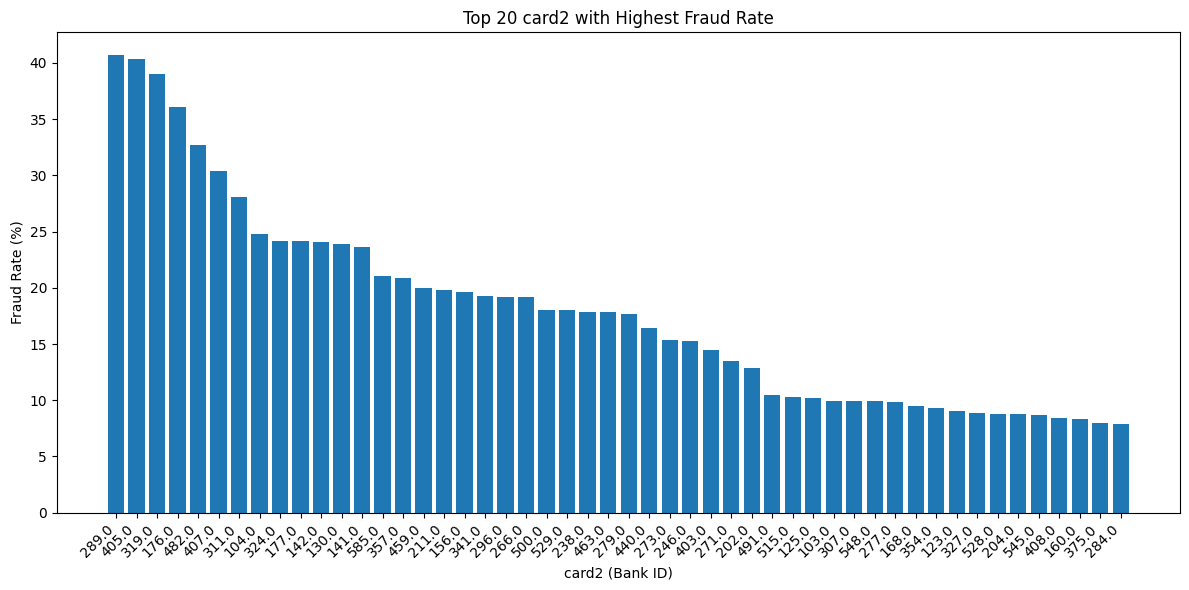

In [32]:

card2_stats = df.groupby('card2')['isFraud'].agg(total='count', fraud='sum')
card2_stats['fraud_rate'] = card2_stats['fraud'] / card2_stats['total']

card2_sorted = card2_stats.sort_values('fraud_rate', ascending=False).head(50)

plt.figure(figsize=(12,6))
plt.bar(card2_sorted.index.astype(str), card2_sorted['fraud_rate']*100)
plt.title("Top 20 card2 with Highest Fraud Rate")
plt.xlabel("card2 (Bank ID)")
plt.ylabel("Fraud Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The highest-risk banks (e.g., 289.0, 405.0) show fraud rates above 40%, which is extremely high compared to the baseline.

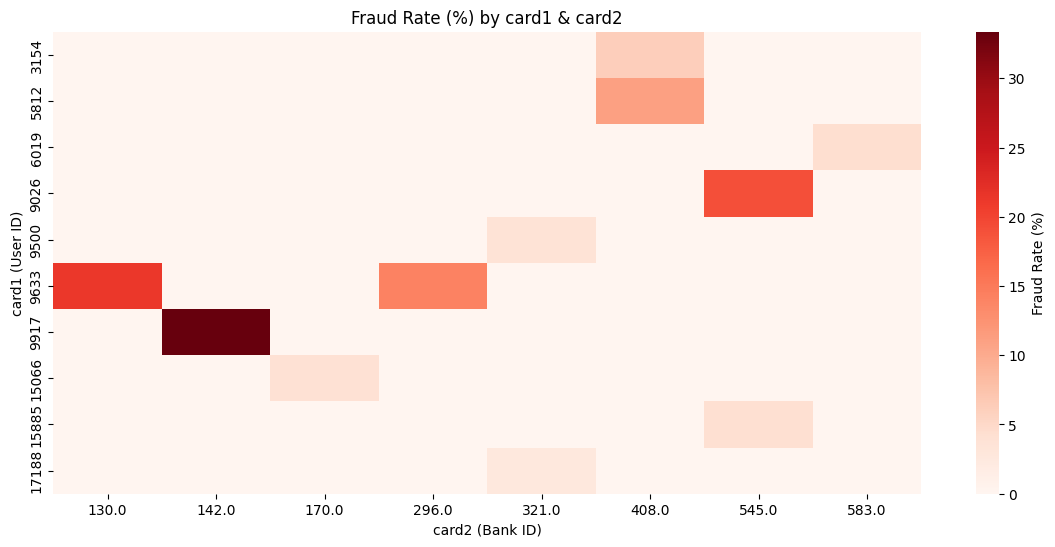

In [37]:
fraud_pairs = (df.groupby(['card1','card2'])['isFraud']
                 .agg(total='count', fraud='sum'))
fraud_pairs['fraud_rate'] = fraud_pairs['fraud'] / fraud_pairs['total']
fraud_pairs = fraud_pairs.reset_index()


# top_pairs = fraud_pairs.sort_values('fraud', ascending=False).head(20)


top_card1 = fraud_pairs.groupby('card1')['fraud'].sum().sort_values(ascending=False).head(10).index
subset = fraud_pairs[fraud_pairs['card1'].isin(top_card1)]

# pivot cho heatmap
pivot = subset.pivot_table(values='fraud_rate', index='card1', columns='card2', fill_value=0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot*100, cmap="Reds", cbar_kws={'label': 'Fraud Rate (%)'})
plt.title("Fraud Rate (%) by card1 & card2")
plt.xlabel("card2 (Bank ID)")
plt.ylabel("card1 (User ID)")
plt.show()

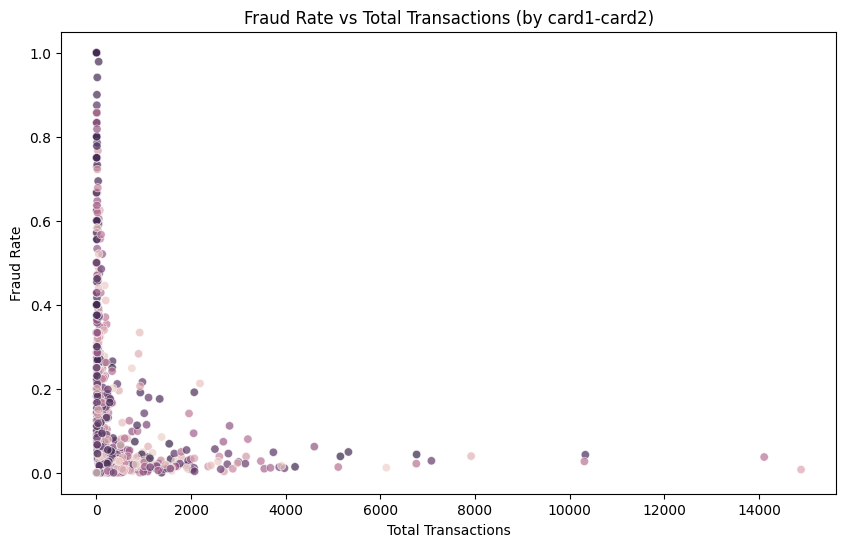

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=fraud_pairs, x='total', y='fraud_rate', hue='card2', alpha=0.7, legend=False)
plt.title("Fraud Rate vs Total Transactions (by card1-card2)")
plt.xlabel("Total Transactions")
plt.ylabel("Fraud Rate")
plt.show()


In [40]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionDay,TransactionHour,TransactionAmt_log,DayOfWeek
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,4.241327,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,

### card3

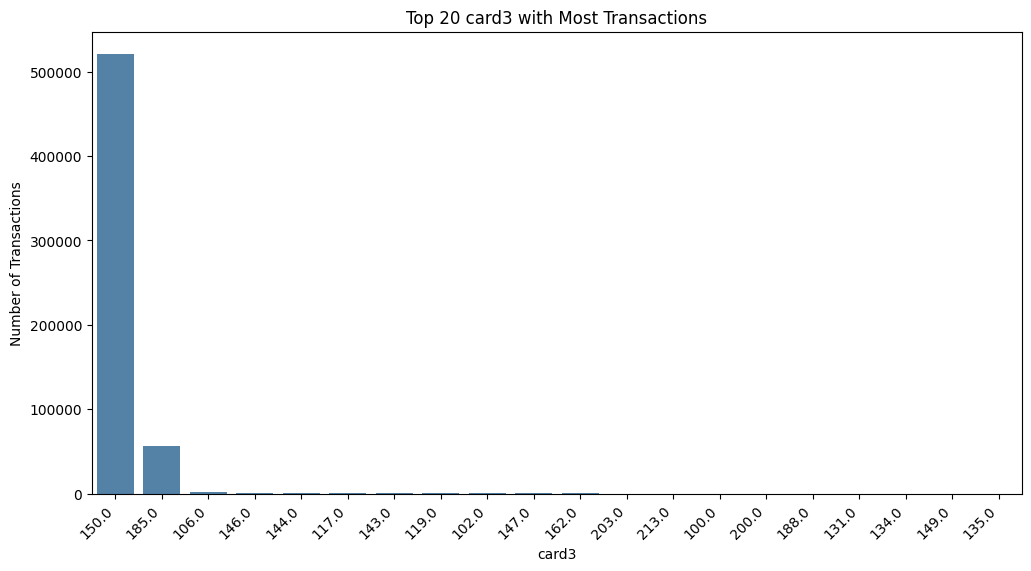

In [41]:
card3_counts = df['card3'].value_counts().head(20)  # lấy top 20 dễ nhìn

plt.figure(figsize=(12,6))
sns.barplot(x=card3_counts.index.astype(str), y=card3_counts.values, color='steelblue')
plt.title("Top 20 card3 with Most Transactions")
plt.xlabel("card3")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45, ha='right')
plt.show()

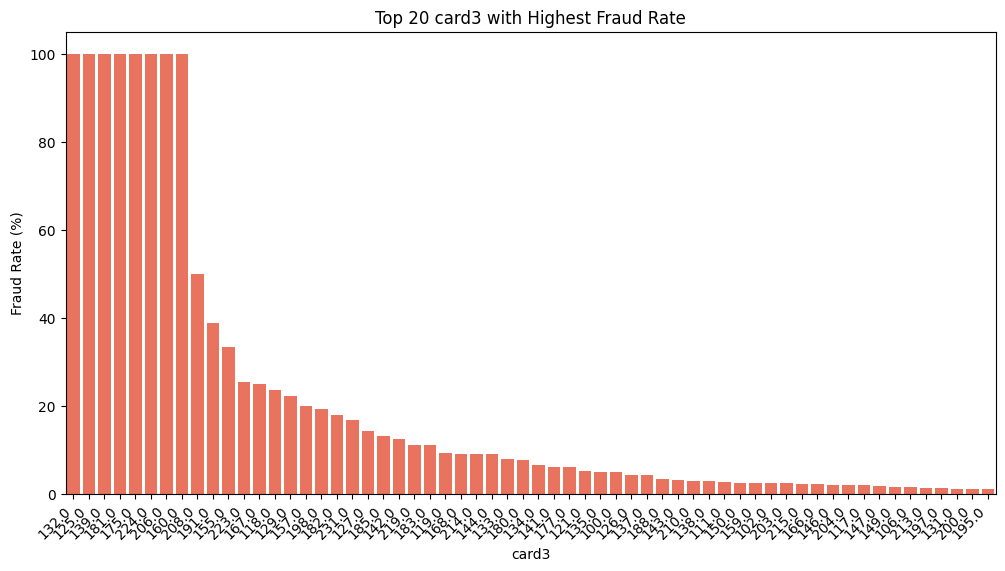

In [48]:
card3_stats = df.groupby('card3')['isFraud'].agg(total='count', fraud='sum')
card3_stats['fraud_rate'] = card3_stats['fraud'] / card3_stats['total']

# lấy top 20 theo fraud_rate
card3_sorted = card3_stats.sort_values('fraud_rate', ascending=False).head(60)

plt.figure(figsize=(12,6))
sns.barplot(x=card3_sorted.index.astype(str), y=card3_sorted['fraud_rate']*100, color='tomato')
plt.title("Top 20 card3 with Highest Fraud Rate")
plt.xlabel("card3")
plt.ylabel("Fraud Rate (%)")
plt.xticks(rotation=45, ha='right')
plt.show()

There are many types of card3 that show a 100% fraud rate, but these categories have only a very small number of transactions. This means the high fraud rate is likely due to low sample size rather than a genuine risk pattern, and should be interpreted with caution.

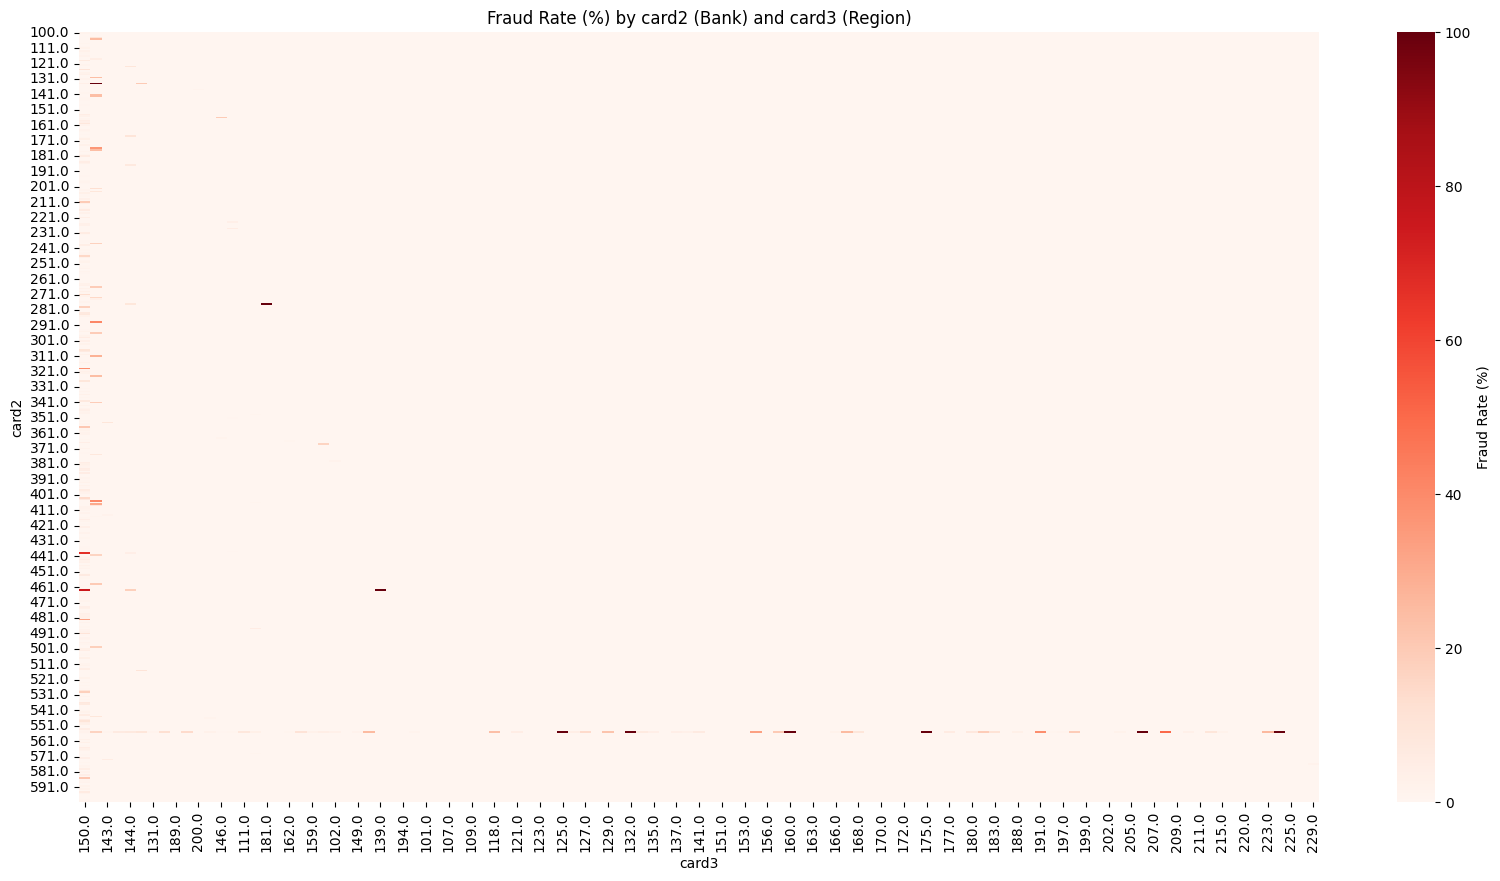

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

fraud_c23 = (df.groupby(['card2','card3'])['isFraud']
               .mean()
               .unstack(fill_value=0))

plt.figure(figsize=(20,10))
sns.heatmap(fraud_c23*100, cmap="Reds", cbar_kws={'label': 'Fraud Rate (%)'})
plt.title("Fraud Rate (%) by card2 (Bank) and card3 (Region)")
plt.xlabel("card3")
plt.ylabel("card2")
plt.show()


### card4

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16732\4270417419.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='card4', data=df, order=df['card4'].value_counts().index, palette="Set2")


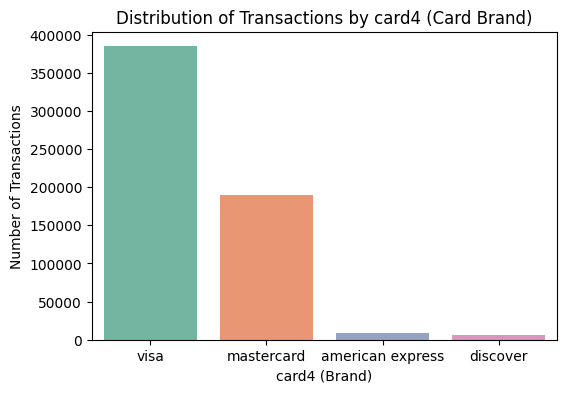

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16732\4270417419.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=card4_stats.index, y=card4_stats['fraud_rate']*100, palette="Set1")


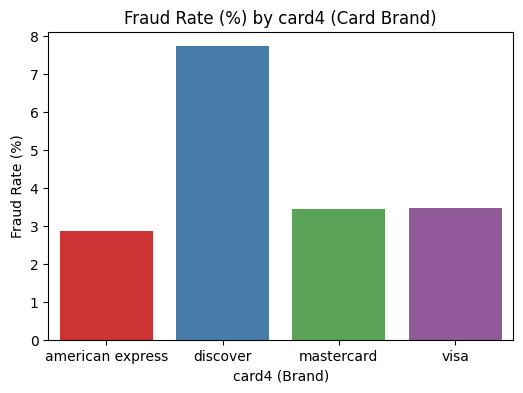

In [54]:

plt.figure(figsize=(6,4))
sns.countplot(x='card4', data=df, order=df['card4'].value_counts().index, palette="Set2")
plt.title("Distribution of Transactions by card4 (Card Brand)")
plt.xlabel("card4 (Brand)")
plt.ylabel("Number of Transactions")
plt.show()


card4_stats = df.groupby('card4')['isFraud'].agg(total='count', fraud='sum')
card4_stats['fraud_rate'] = card4_stats['fraud'] / card4_stats['total']

plt.figure(figsize=(6,4))
sns.barplot(x=card4_stats.index, y=card4_stats['fraud_rate']*100, palette="Set1")
plt.title("Fraud Rate (%) by card4 (Card Brand)")
plt.xlabel("card4 (Brand)")
plt.ylabel("Fraud Rate (%)")
plt.show()

While Visa has the highest number of transactions, the Discover card shows the highest risk with the highest fraud rate. This indicates that although Visa dominates in volume, fraud detection efforts should pay particular attention to Discover, as it is disproportionately associated with fraudulent activity relative to its transaction count.

### card6

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16732\2108390286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='card6', data=df, order=df['card6'].value_counts().index, palette="Set2")


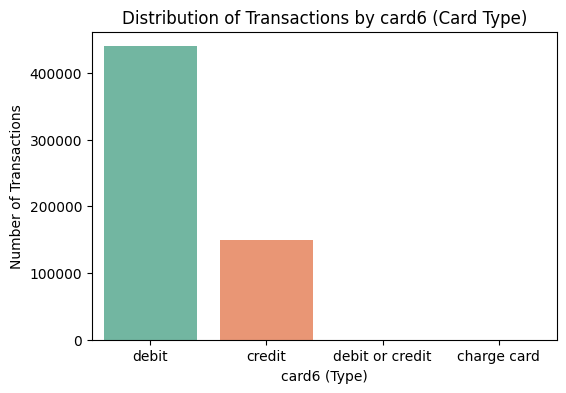

C:\Users\LEGION\AppData\Local\Temp\ipykernel_16732\2108390286.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=card6_stats.index, y=card6_stats['fraud_rate']*100, palette="Set1")


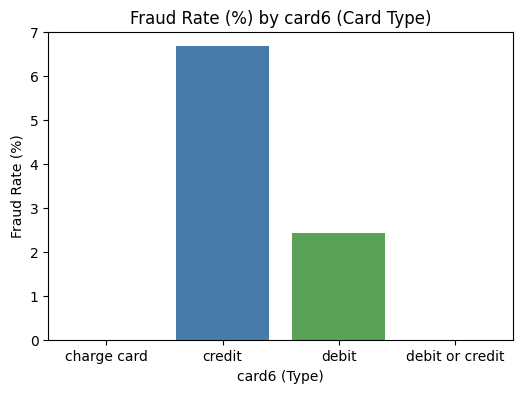

In [55]:

plt.figure(figsize=(6,4))
sns.countplot(x='card6', data=df, order=df['card6'].value_counts().index, palette="Set2")
plt.title("Distribution of Transactions by card6 (Card Type)")
plt.xlabel("card6 (Type)")
plt.ylabel("Number of Transactions")
plt.show()


card6_stats = df.groupby('card6')['isFraud'].agg(total='count', fraud='sum')
card6_stats['fraud_rate'] = card6_stats['fraud'] / card6_stats['total']

plt.figure(figsize=(6,4))
sns.barplot(x=card6_stats.index, y=card6_stats['fraud_rate']*100, palette="Set1")
plt.title("Fraud Rate (%) by card6 (Card Type)")
plt.xlabel("card6 (Type)")
plt.ylabel("Fraud Rate (%)")
plt.show()

